<a href="https://colab.research.google.com/github/Birjesh786/Gym-Exercise-EDA-with-Model-GB-RF-XGB-CB-KNN-SVM-/blob/main/GYM_Exercise_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GYM Exercise (EDA) Exploratory Data Analysis

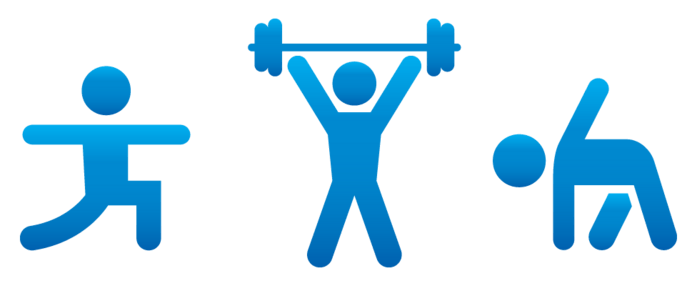

## Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

## Load dataset

In [ ]:
gym_data = pd.read_csv('GymDataset.csv', index_col=0)

In [ ]:
gym_data.columns = gym_data.columns.str.strip()
print(gym_data.columns)

Index(['Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating',
       'RatingDesc'],
      dtype='object')


In [ ]:
gym_data.columns = gym_data.columns.str.replace('[^a-zA-Z0-9]', '', regex=True)

## Drop unrequired columns and create a new dataset

In [ ]:
new_gym_data = gym_data.drop(['Desc', 'RatingDesc'], axis=1)

In [ ]:
new_gym_data.columns

Index(['Title', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating'], dtype='object')

In [ ]:
new_gym_data

,Title,Type,BodyPart,Equipment,Level,Rating
Unnamed,,,,,,
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate,NaN
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate,NaN
3,Banded crunch,Strength,Abdominals,Bands,Intermediate,NaN
4,Crunch,Strength,Abdominals,Bands,Intermediate,NaN
...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1
2914,Lying Close-Grip Barbell Triceps Press To Chin,Strength,Triceps,E-Z Curl Bar,Beginner,8.1
2915,EZ-Bar Skullcrusher - Gethin Variation,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN


## Let's visual our data for better understanding

### Gym Types

In [ ]:
type_count = new_gym_data['Type'].value_counts().reset_index()
type_count.columns = ['Type', 'Count']

fig = px.bar(type_count, x='Type', y='Count', color='Type', title='Count of Gym Types')

# Add annotations
for index, row in type_count.iterrows():
    fig.add_annotation(
        x=row['Type'], y=row['Count'],
        text=str(row['Count']),
        showarrow=True,
        arrowhead=5,
        font=dict(size=12, color='white'),  # Set text color to white
        bgcolor='black',  # Set background color to black
        opacity=0.7
    )

# Customize the layout
fig.update_layout(
    paper_bgcolor='black',  # Set the overall background color to black
    plot_bgcolor='black',  # Set the plot area background color to black
    font=dict(color='white'),  # Set the default text color to white
)

fig.show()

### Equipment Distribution

In [ ]:
equipment_distribution = new_gym_data['Equipment'].value_counts().reset_index()
equipment_distribution.columns = ['Equipment', 'Count']

fig = px.pie(equipment_distribution, names='Equipment', values='Count', title='Equipment Distribution')

# Customize the layout
fig.update_layout(
    paper_bgcolor='black',  # Set the overall background color to black
    font=dict(color='white'),  # Set the text color to white
)

fig.show()

### Rating Vs. Gym Type

In [ ]:
type_avg_rating = new_gym_data.groupby('Type')['Rating'].mean().reset_index()

fig = px.scatter(type_avg_rating, x='Type', y='Rating', color='Rating', title='Rating vs. Gym Type')

# Add annotations
for index, row in type_avg_rating.iterrows():
    fig.add_annotation(
        x=row['Type'], y=row['Rating'],
        text=f"Rating: {row['Rating']:.2f}",
        showarrow=True,
        arrowhead=5,
        font=dict(size=12, color='white'),  # Set text color to white
        bgcolor='black',  # Set background color to black
        opacity=0.7
    )

# Customize the layout
fig.update_layout(
    paper_bgcolor='black',  # Set the overall background color to black
    plot_bgcolor='black',  # Set the plot area background color to black
    font=dict(color='white'),  # Set the default text color to white
)

fig.show()

In [ ]:
bodypart_avg_rating = new_gym_data.groupby('BodyPart')['Rating'].mean().reset_index()

fig = px.scatter(bodypart_avg_rating, x='BodyPart', y='Rating', color='Rating', title='Rating vs. BodyPart')

# Add annotations
for index, row in bodypart_avg_rating.iterrows():
    fig.add_annotation(
        x=row['BodyPart'], y=row['Rating'],
        text=f"Rating: {row['Rating']:.2f}",
        showarrow=True,
        arrowhead=5,
        font=dict(size=12, color='white'),  # Set text color to white
        bgcolor='black',  # Set background color to black
        opacity=0.7
    )

# Customize the layout
fig.update_layout(
    paper_bgcolor='black',  # Set the overall background color to black
    plot_bgcolor='black',  # Set the plot area background color to black
    font=dict(color='white'),  # Set the default text color to white
)

fig.show()

### Level Distribution

In [ ]:
# Create a bar chart
fig = px.bar(new_gym_data, x='Level', color='Level', title='Level Distribution')

# Calculate the count for each level
level_counts = new_gym_data['Level'].value_counts().reset_index()
level_counts.columns = ['Level', 'Count']

# Add annotations to the bars
for index, row in level_counts.iterrows():
    fig.add_annotation(
        x=row['Level'],
        y=row['Count'] + 5,  # Adjust the vertical position of the annotation
        text=str(row['Count']),
        showarrow=False,
        font=dict(size=12, color='white')  # Set annotation text color to white
    )

# Customize the layout
fig.update_layout(
    paper_bgcolor='black',  # Set the overall background color to black
    plot_bgcolor='black',  # Set the plot area background color to black
    font=dict(color='white'),  # Set text color to white for legends, axis labels, etc.
)

# Customize the bar colors
custom_colors = ['red', 'blue', 'green']  # Replace with your desired bar colors
for i, level in enumerate(level_counts['Level']):
    fig.data[i].marker.color = custom_colors[i % len(custom_colors)]  # Cycle through custom colors

fig.show()

## Let's deep dive our data

### Create a fnction provides quick and useful information

In [ ]:
def GiveBasicDetails(data):
    print("Dataframe Size: ",data.shape)
    print("-----------------------------------")
    print(data.info())
    print("-----------------------------------")
    print(data.describe())
    print("-----------------------------------")
    print(data.isna().sum()*100/data.shape[0])

In [ ]:
GiveBasicDetails(new_gym_data)

Dataframe Size:  (2918, 6)
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2917
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      2918 non-null   object 
 1   Type       2918 non-null   object 
 2   BodyPart   2918 non-null   object 
 3   Equipment  2918 non-null   object 
 4   Level      2918 non-null   object 
 5   Rating     1031 non-null   float64
dtypes: float64(1), object(5)
memory usage: 159.6+ KB
None
-----------------------------------
            Rating
count  1031.000000
mean      5.919690
std       3.584607
min       0.000000
25%       3.000000
50%       7.900000
75%       8.700000
max       9.600000
-----------------------------------
Title         0.000000
Type          0.000000
BodyPart      0.000000
Equipment     0.000000
Level         0.000000
Rating       64.667581
dtype: float64


### Target for catagorial columns [Type,BodyPart,Equipment,Level]

In [ ]:
cat_cols = ['Type','BodyPart','Equipment','Level']

for i in cat_cols:
    print(new_gym_data[i].value_counts())
    print('-----------------------------------------')

Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: Type, dtype: int64
-----------------------------------------
Abdominals     662
Quadriceps     646
Shoulders      340
Chest          262
Biceps         168
Triceps        151
Lats           124
Hamstrings     121
Middle Back    118
Lower Back      97
Glutes          81
Calves          47
Forearms        31
Traps           24
Abductors       21
Adductors       17
Neck             8
Name: BodyPart, dtype: int64
-----------------------------------------
Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
None               32
E-Z Curl Bar       22
Foam Roll          11
Name: Equipment, dtype: int64
-------------

### NULL values

In [ ]:
new_gym_data.isna().sum()

Title           0
Type            0
BodyPart        0
Equipment       0
Level           0
Rating       1887
dtype: int64

### You can manually customize the category "i" for a more visually appealing output

In [ ]:
i = 'BodyPart'
gym_data_sorted = new_gym_data.sort_values(by=[i, 'Rating'], ascending=[True, False])
gym_data_sorted.groupby(i).first()

,Title,Type,Equipment,Level,Rating
BodyPart,,,,,
Abdominals,Landmine twist,Strength,Other,Intermediate,9.5
Abductors,Standing Hip Circles,Stretching,Body Only,Beginner,8.8
Adductors,Thigh adductor,Strength,Machine,Intermediate,9.0
Biceps,Incline Hammer Curls,Strength,Dumbbell,Beginner,9.5
Calves,Smith Machine Calf Raise,Strength,Machine,Intermediate,9.2
Chest,Pushups,Strength,Body Only,Intermediate,9.2
Forearms,Rickshaw Carry,Strongman,Other,Beginner,9.6
Glutes,Barbell glute bridge,Powerlifting,Barbell,Intermediate,9.4
Hamstrings,Barbell Deadlift,Strength,Barbell,Intermediate,9.4


In [ ]:
# I'have already sorted and grouped the data as mentioned in your code
gym_data_sorted = new_gym_data.sort_values(by=[i, 'Rating'], ascending=[True, False])
grouped_data = gym_data_sorted.groupby(i).first().reset_index()

# Creating a horizontal bar chart
fig = px.bar(grouped_data, x='Rating', y=i, color=i, text='Rating', orientation='h',
             title='Top-Rated Gyms by {}'.format(i))

# Customize the layout
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title=i,
    yaxis_categoryorder='total ascending',  # Invert the y-axis to display the highest rating at the top
    plot_bgcolor='black',  # Set the plot background color to black
    paper_bgcolor='black',  # Set the overall background color to black
    font=dict(color='white'),  # Set text color to white
)

# Add annotations to the bars
fig.update_traces(textposition='inside', textfont=dict(size=12, color='white'))

fig.show()

In [ ]:
new_gym_data.groupby(i).last()

,Title,Type,Equipment,Level,Rating
BodyPart,,,,,
Abdominals,Feet-elevated plank on ball,Strength,Exercise Ball,Intermediate,6.4
Abductors,MetaBurn Groiner,Strength,Body Only,Intermediate,0.0
Adductors,Adductor/Groin,Stretching,None,Beginner,3.6
Biceps,30 Arms Standing EZ-Bar Curl,Strength,E-Z Curl Bar,Intermediate,7.9
Calves,Standing Soleus And Achilles Stretch,Stretching,None,Beginner,4.2
Chest,Feet-elevated push-up on ball,Strength,Exercise Ball,Intermediate,0.0
Forearms,Kneeling Forearm Stretch,Stretching,None,Beginner,5.2
Glutes,Downward Facing Balance,Strength,Exercise Ball,Beginner,4.0
Hamstrings,Ball Hamstring Hat Trick,Strength,Exercise Ball,Intermediate,8.8


In [ ]:
# Group the data by 'BodyPart' and select the last (lowest rated) gym within each group
grouped_data = new_gym_data.groupby('BodyPart').last().reset_index()

# Creating a horizontal bar chart for low-rated gyms
fig = px.bar(grouped_data, x='Rating', y='BodyPart', color='BodyPart', text='Rating', orientation='h',
             title='Low-Rated Gyms by BodyPart')

# Customize the layout
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='BodyPart',
    yaxis_categoryorder='total ascending',  # Invert the y-axis to display the lowest rating at the top
    plot_bgcolor='black',  # Set the plot background color to black
    paper_bgcolor='black',  # Set the overall background color to black
    font=dict(color='white'),  # Set text color to white
)

# Add annotations to the bars
fig.update_traces(textposition='inside', textfont=dict(size=12, color='white'))

fig.show()

### Analysis by Level's

In [ ]:
gymlevel_beginner = gym_data[gym_data['Level'] == 'Beginner'].drop(['Desc', 'Rating', 'RatingDesc'], axis=1)
gymlevel_intermediate = gym_data[gym_data.Level == 'Intermediate'].drop(['Desc', 'Rating', 'RatingDesc'], axis=1)
gymlevel_expert = gym_data[gym_data.Level == 'Expert'].drop(['Desc', 'Rating', 'RatingDesc'], axis=1)

In [ ]:
gymlevel_beginner

,Title,Type,BodyPart,Equipment,Level
Unnamed,,,,,
11,Bench barbell roll-out,Strength,Abdominals,Barbell,Beginner
12,Barbell Side Bend,Strength,Abdominals,Barbell,Beginner
20,Advanced Kettlebell Windmill,Strength,Abdominals,Kettlebells,Beginner
22,Kettlebell Pass Between The Legs,Strength,Abdominals,Kettlebells,Beginner
40,Dumbbell spell caster,Strength,Abdominals,Dumbbell,Beginner
...,...,...,...,...,...
2841,Low Cable Triceps Extension,Strength,Triceps,Cable,Beginner
2889,Standing Towel Triceps Extension,Strength,Triceps,Body Only,Beginner
2892,Overhead Triceps,Stretching,Triceps,Body Only,Beginner


In [ ]:
# Create a scatter plot for 'Beginner Level Gym Equipment' with increased dot size
fig_beginner_scatter = px.scatter(
    gymlevel_beginner,
    x='BodyPart',
    y='Equipment',
    color='Equipment',
    title='Beginner Level Gym Equipment',
    labels={'BodyPart': 'Body Part', 'Equipment': 'Equipment'},
)

# Increase dot size using the marker argument
fig_beginner_scatter.update_traces(
    marker=dict(size=10),  # Adjust the size value as needed
)

# Customize the layout
fig_beginner_scatter.update_layout(
    plot_bgcolor='black',  # Set the plot background color to black
    paper_bgcolor='black',  # Set the overall background color to black
    font=dict(color='white'),  # Set text color to white
)

# Show the scatter plot with increased dot size
fig_beginner_scatter.show()

In [ ]:
gymlevel_intermediate

,Title,Type,BodyPart,Equipment,Level
Unnamed,,,,,
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate
3,Banded crunch,Strength,Abdominals,Bands,Intermediate
4,Crunch,Strength,Abdominals,Bands,Intermediate
...,...,...,...,...,...
2912,EZ-Bar Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate
2913,EZ-bar skullcrusher-,Strength,Triceps,E-Z Curl Bar,Intermediate
2915,EZ-Bar Skullcrusher - Gethin Variation,Strength,Triceps,E-Z Curl Bar,Intermediate


In [ ]:
# Create a scatter plot for 'Intermediate Level Gym Equipment' with increased dot size
fig_intermediate_scatter = px.scatter(
    gymlevel_intermediate,  # Use the intermediate level DataFrame
    x='BodyPart',
    y='Equipment',
    color='Equipment',
    title='Intermediate Level Gym Equipment',
    labels={'BodyPart': 'Body Part', 'Equipment': 'Equipment'},
)

# Increase dot size using the marker argument
fig_intermediate_scatter.update_traces(
    marker=dict(size=10),  # Adjust the size value as needed
)

# Customize the layout
fig_intermediate_scatter.update_layout(
    plot_bgcolor='black',  # Set the plot background color to black
    paper_bgcolor='black',  # Set the overall background color to black
    font=dict(color='white'),  # Set text color to white
)

# Show the scatter plot with increased dot size
fig_intermediate_scatter.show()

In [ ]:
gymlevel_expert

,Title,Type,BodyPart,Equipment,Level
Unnamed,,,,,
61,Dumbbell Get-Up Sit-Up,Strength,Abdominals,Dumbbell,Expert
1462,Assisted Single-Arm Pull-Up,Strength,Lats,Other,Expert
1463,Assisted Single-Arm Chin-Up,Strength,Lats,Other,Expert
1802,Power snatch-,Olympic Weightlifting,Quadriceps,Barbell,Expert
1806,Narrow-stance squat,Strength,Quadriceps,Barbell,Expert
1812,Barbell forward lunge,Strength,Quadriceps,Barbell,Expert
1817,Barbell hack squat,Strength,Quadriceps,Barbell,Expert
1829,Single-arm side deadlift,Strength,Quadriceps,Barbell,Expert
1876,Single-arm kettlebell overhead squat,Strength,Quadriceps,Kettlebells,Expert


In [ ]:
# Create a scatter plot for 'Expert Level Gym Equipment' with increased dot size
fig_expert_scatter = px.scatter(
    gymlevel_expert,  # Use the expert level DataFrame
    x='BodyPart',
    y='Equipment',
    color='Equipment',
    title='Expert Level Gym Equipment',
    labels={'BodyPart': 'Body Part', 'Equipment': 'Equipment'},
)

# Increase dot size using the marker argument
fig_expert_scatter.update_traces(
    marker=dict(size=10),  # Adjust the size value as needed
)

# Customize the layout
fig_expert_scatter.update_layout(
    plot_bgcolor='black',  # Set the plot background color to black
    paper_bgcolor='black',  # Set the overall background color to black
    font=dict(color='white'),  # Set text color to white
)

# Show the scatter plot with increased dot size
fig_expert_scatter.show()

### Analysis by Equipments & BodyParts

In [ ]:
equipment_counts = gym_data['Equipment'].value_counts()
bodypart_counts = gym_data['BodyPart'].value_counts()

In [ ]:
# Create a DataFrame from the equipment_counts
equipment_counts_df = equipment_counts.reset_index()
equipment_counts_df.columns = ['Equipment Names', 'Count']

# Sort the DataFrame by count in descending order
equipment_counts_df = equipment_counts_df.sort_values(by='Count', ascending=False)

# Create a gradient color scale for the bars
color_scale = px.colors.sequential.Plasma[::-1]

# Create a bar chart for equipment counts with gradient color and annotations
fig1 = go.Figure()

for i, row in equipment_counts_df.iterrows():
    equipment = row['Equipment Names']
    count = row['Count']
    color_value = i / len(equipment_counts_df)  # Gradient color value

    fig1.add_trace(
        go.Bar(
            x=[equipment],
            y=[count],
            text=[count],
            name=equipment,
            marker=dict(color=color_value, colorscale=color_scale),
            textposition='outside',
        )
    )

# Customize the layout for the black background and white text
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title='Equipment Counts',
    title_font_color='white',
    xaxis_title='Equipment Names',
    yaxis_title='Count',
    xaxis_title_font_color='white',
    yaxis_title_font_color='white',
)

# Add a custom legend title
fig1.update_layout(
    legend_title_text='Equipment',
)

# Show the figure
fig1.show()

In [ ]:
# Create a DataFrame from the bodypart_counts
bodypart_counts_df = bodypart_counts.reset_index()
bodypart_counts_df.columns = ['BodyPart Names', 'Count']

# Sort the DataFrame by count in descending order
bodypart_counts_df = bodypart_counts_df.sort_values(by='Count', ascending=False)

# Create a gradient color scale for the bars
color_scale = px.colors.sequential.Plasma[::-1]

# Create a bar chart for bodypart counts with gradient color and annotations
fig2 = go.Figure()

for i, row in bodypart_counts_df.iterrows():
    body_part = row['BodyPart Names']
    count = row['Count']
    color_value = i / len(bodypart_counts_df)  # Gradient color value

    fig2.add_trace(
        go.Bar(
            x=[body_part],
            y=[count],
            text=[count],
            name=body_part,
            marker=dict(color=color_value, colorscale=color_scale),
            textposition='outside',
        )
    )

# Customize the layout for the black background and white text
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title='BodyPart Counts',
    title_font_color='white',
    xaxis_title='BodyPart Names',
    yaxis_title='Count',
    xaxis_title_font_color='white',
    yaxis_title_font_color='white',
)

# Add a custom legend title
fig2.update_layout(
    legend_title_text='Body Parts',
)

# Show the figure
fig2.show()

In [ ]:
equipment_counts_by_level = gym_data.groupby(['Level', 'Equipment']).size().unstack(fill_value=0)
bodypart_counts_by_level = gym_data.groupby(['Level', 'BodyPart']).size().unstack(fill_value=0)

In [ ]:
equipment_counts_by_level = equipment_counts_by_level.reset_index()
bodypart_counts_by_level = bodypart_counts_by_level.reset_index()

In [ ]:
equipment_counts_by_level

Equipment,Level,Bands,Barbell,Body Only,Cable,Dumbbell,E-Z Curl Bar,Exercise Ball,Foam Roll,Kettlebells,Machine,Medicine Ball,None,Other
0,Beginner,20,99,82,26,51,4,6,4,32,23,10,25,77
1,Expert,0,5,3,0,1,0,0,0,1,1,0,0,2
2,Intermediate,80,178,993,200,464,18,29,7,116,151,28,7,175


In [ ]:
bodypart_counts_by_level

BodyPart,Level,Abdominals,Abductors,Adductors,Biceps,Calves,Chest,Forearms,Glutes,Hamstrings,Lats,Lower Back,Middle Back,Neck,Quadriceps,Shoulders,Traps,Triceps
0,Beginner,29,3,7,37,16,67,18,13,58,19,20,14,6,76,47,5,24
1,Expert,1,0,0,0,0,0,0,0,0,2,0,0,0,10,0,0,0
2,Intermediate,632,18,10,131,31,195,13,68,63,103,77,104,2,560,293,19,127


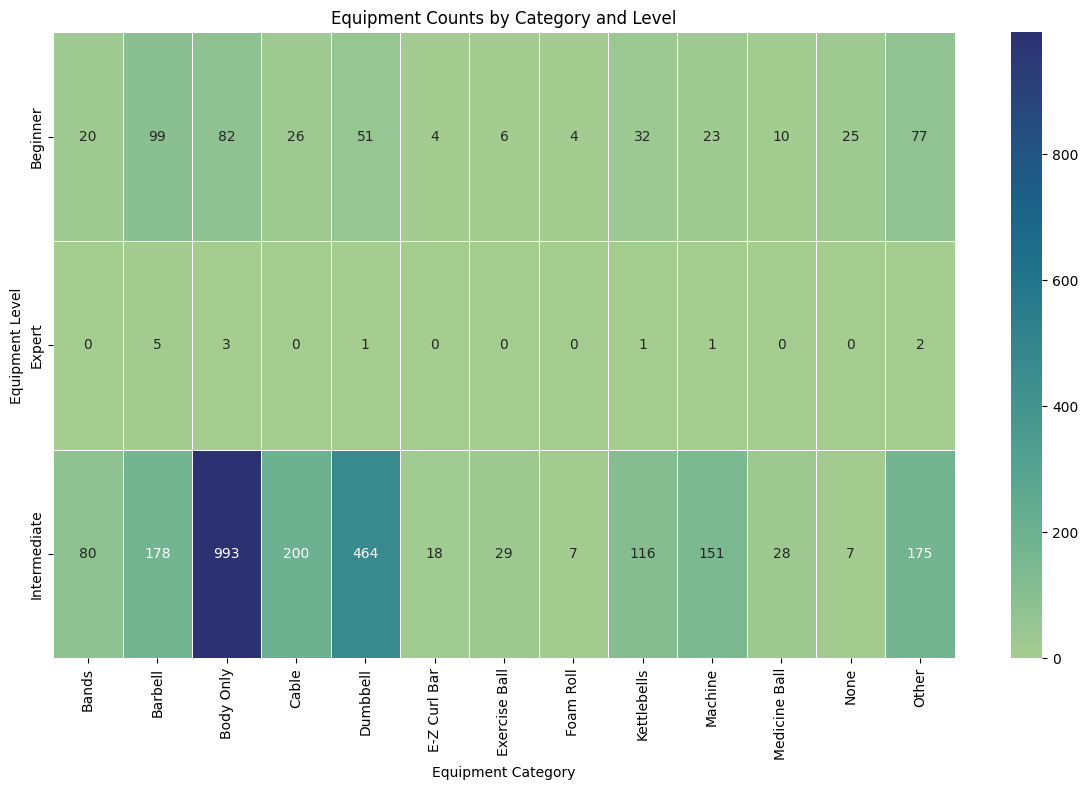

In [ ]:
# Create a DataFrame from the provided data
data = {
    'Level': ['Beginner', 'Expert', 'Intermediate'],
    'Bands': [20, 0, 80],
    'Barbell': [99, 5, 178],
    'Body Only': [82, 3, 993],
    'Cable': [26, 0, 200],
    'Dumbbell': [51, 1, 464],
    'E-Z Curl Bar': [4, 0, 18],
    'Exercise Ball': [6, 0, 29],
    'Foam Roll': [4, 0, 7],
    'Kettlebells': [32, 1, 116],
    'Machine': [23, 1, 151],
    'Medicine Ball': [10, 0, 28],
    'None': [25, 0, 7],
    'Other': [77, 2, 175]
}

df = pd.DataFrame(data)

# Set the 'Level' column as the index for the DataFrame
df.set_index('Level', inplace=True)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt='d', cmap='crest', linewidths=.5)
plt.xlabel('Equipment Category')
plt.ylabel('Equipment Level')
plt.title('Equipment Counts by Category and Level')
plt.tight_layout()
plt.show()

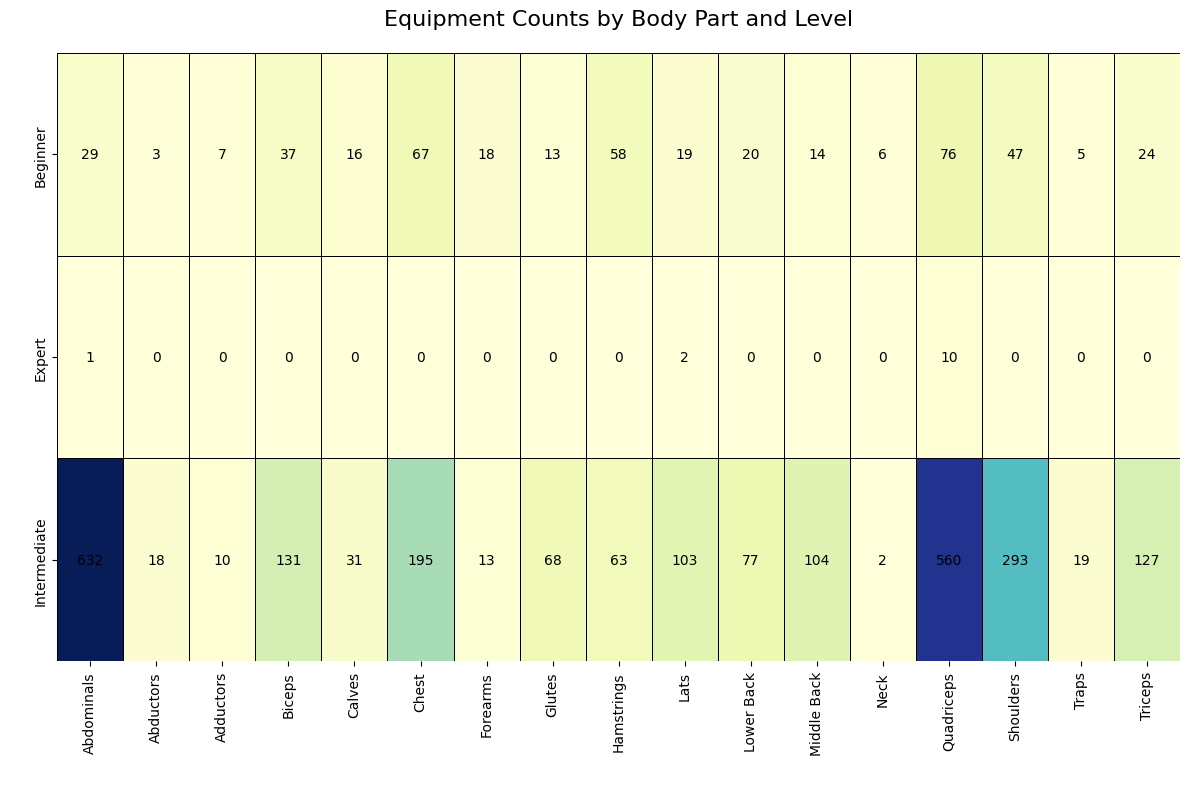

In [ ]:
# Create a DataFrame from the provided data
data = {
    'Level': ['Beginner', 'Expert', 'Intermediate'],
    'Abdominals': [29, 1, 632],
    'Abductors': [3, 0, 18],
    'Adductors': [7, 0, 10],
    'Biceps': [37, 0, 131],
    'Calves': [16, 0, 31],
    'Chest': [67, 0, 195],
    'Forearms': [18, 0, 13],
    'Glutes': [13, 0, 68],
    'Hamstrings': [58, 0, 63],
    'Lats': [19, 2, 103],
    'Lower Back': [20, 0, 77],
    'Middle Back': [14, 0, 104],
    'Neck': [6, 0, 2],
    'Quadriceps': [76, 10, 560],
    'Shoulders': [47, 0, 293],
    'Traps': [5, 0, 19],
    'Triceps': [24, 0, 127]
}

df = pd.DataFrame(data)

# Set the 'Level' column as the index for the DataFrame
df.set_index('Level', inplace=True)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, cbar=False,
            annot_kws={"color": "black", "fontsize": 10},
            linewidth=0.5, linecolor='black')

plt.xlabel('Body Part', color='white', fontsize=12)
plt.ylabel('Equipment Level', color='white', fontsize=12)
plt.title('Equipment Counts by Body Part and Level', color='black', fontsize=16, pad=20, backgroundcolor='white')

# Set background color to black
ax = plt.gca()
ax.set_facecolor('black')

plt.tight_layout()
plt.show()

## Let's choose one equipment, my favourite Dumbbell

In [ ]:
Dumbbell_counts_by_level = gym_data[gym_data['Equipment'] == 'Dumbbell'].groupby(['Level']).size().reset_index(name='Dumbbell_count')

In [ ]:
Dumbbell_counts_by_level

,Level,Dumbbell_count
0,Beginner,51
1,Expert,1
2,Intermediate,464


In [ ]:
Dumbbell_beginner = gym_data[(gym_data['Equipment'] == 'Dumbbell') & (gym_data['Level'] == 'Beginner')].drop(['Desc', 'Rating', 'RatingDesc', 'Title'], axis=1)
Dumbbell_intermediate = gym_data[(gym_data['Equipment'] == 'Dumbbell') & (gym_data['Level'] == 'Intermediate')].drop(['Desc', 'Rating', 'RatingDesc', 'Title'], axis=1)
Dumbbell_expert = gym_data[(gym_data['Equipment'] == 'Dumbbell') & (gym_data['Level'] == 'Expert')].drop(['Desc', 'Rating', 'RatingDesc', 'Title'], axis=1)

In [ ]:
Dumbbell_beginner

,Type,BodyPart,Equipment,Level
Unnamed,,,,
40,Strength,Abdominals,Dumbbell,Beginner
731,Strength,Biceps,Dumbbell,Beginner
733,Strength,Biceps,Dumbbell,Beginner
735,Strength,Biceps,Dumbbell,Beginner
737,Strength,Biceps,Dumbbell,Beginner
741,Strength,Biceps,Dumbbell,Beginner
745,Strength,Biceps,Dumbbell,Beginner
747,Strength,Biceps,Dumbbell,Beginner
748,Strength,Biceps,Dumbbell,Beginner


In [ ]:
# Count the occurrences of each 'BodyPart' in Dumbbell_beginner
body_part_counts = Dumbbell_beginner['BodyPart'].value_counts().reset_index()
body_part_counts.columns = ['BodyPart', 'Count']

# Sort the DataFrame by count in descending order
body_part_counts = body_part_counts.sort_values(by='Count', ascending=False)

# Create a gradient color scale for the bars
color_scale = px.colors.sequential.Plasma[::-1]

# Create a bar chart with gradient color, annotations, and legends
fig = go.Figure()

for i, row in body_part_counts.iterrows():
    body_part = row['BodyPart']
    count = row['Count']
    color_value = i / len(body_part_counts)  # Gradient color value

    fig.add_trace(
        go.Bar(
            x=[body_part],
            y=[count],
            text=[count],
            name=body_part,
            marker=dict(color=color_value, colorscale=color_scale),
            textposition='outside',
        )
    )

# Customize the layout with a black background and white text
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title='Distribution of BodyPart in Dumbbell Beginner Exercises',
    xaxis_title='Body Part',
    yaxis_title='Count',
    legend_title_text='Body Part',
)

# Show the chart
fig.show()

In [ ]:
Dumbbell_intermediate

,Type,BodyPart,Equipment,Level
Unnamed,,,,
39,Strength,Abdominals,Dumbbell,Intermediate
41,Strength,Abdominals,Dumbbell,Intermediate
42,Strength,Abdominals,Dumbbell,Intermediate
43,Strength,Abdominals,Dumbbell,Intermediate
44,Strength,Abdominals,Dumbbell,Intermediate
...,...,...,...,...
2820,Strength,Triceps,Dumbbell,Intermediate
2821,Strength,Triceps,Dumbbell,Intermediate
2822,Strength,Triceps,Dumbbell,Intermediate


In [ ]:
# Count the occurrences of each 'BodyPart' in Dumbbell_intermediate
body_part_counts = Dumbbell_intermediate['BodyPart'].value_counts().reset_index()
body_part_counts.columns = ['BodyPart', 'Count']

# Sort the DataFrame by count in descending order
body_part_counts = body_part_counts.sort_values(by='Count', ascending=False)

# Create a gradient color scale for the bars
color_scale = px.colors.sequential.Plasma[::-1]

# Create a bar chart with gradient color, annotations, and legends
fig = go.Figure()

for i, row in body_part_counts.iterrows():
    body_part = row['BodyPart']
    count = row['Count']
    color_value = i / len(body_part_counts)  # Gradient color value

    fig.add_trace(
        go.Bar(
            x=[body_part],
            y=[count],
            text=[count],
            name=body_part,
            marker=dict(color=color_value, colorscale=color_scale),
            textposition='outside',
        )
    )

# Customize the layout with a black background and white text
fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    title='Distribution of BodyPart in Dumbbell Intermediate Exercises',
    xaxis_title='Body Part',
    yaxis_title='Count',
    legend_title_text='Body Part',
)

# Show the chart
fig.show()

In [ ]:
Dumbbell_expert

,Type,BodyPart,Equipment,Level
Unnamed,,,,
61,Strength,Abdominals,Dumbbell,Expert


## Last wordcloud

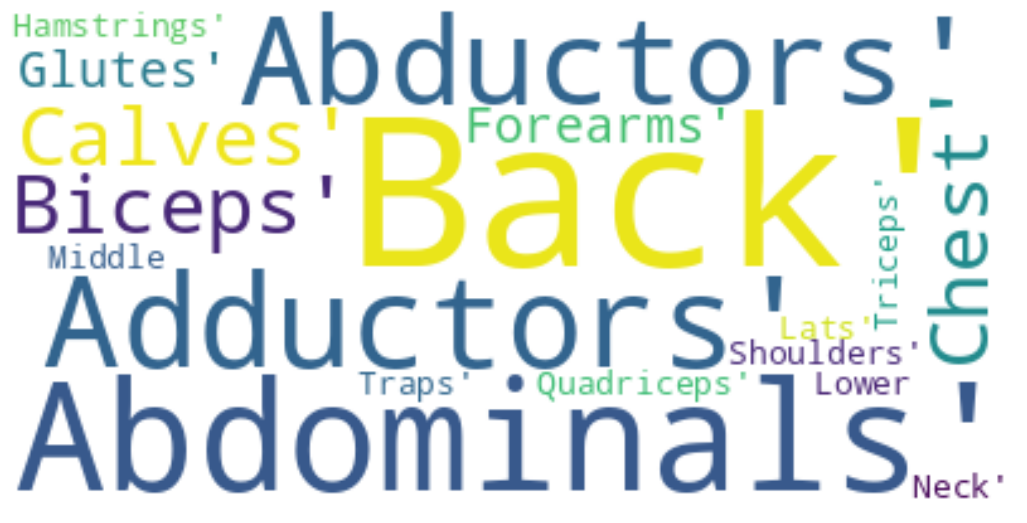

In [ ]:
text = gym_data["BodyPart"].unique()

wordcloud = WordCloud(max_words=1000000, background_color="white").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

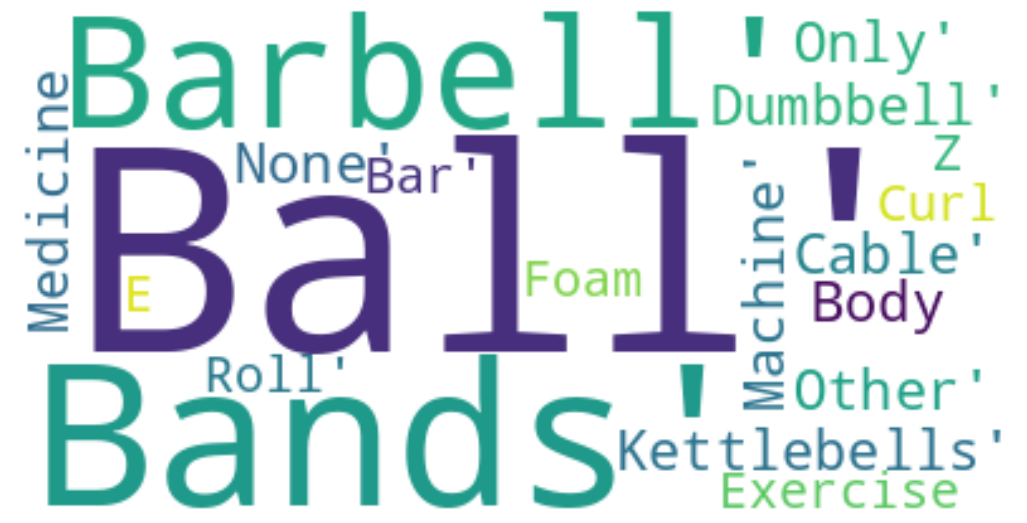

In [ ]:
text = gym_data["Equipment"].unique()

wordcloud = WordCloud(max_words=1000000, background_color="white").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## I hope this EDA is helpful next step Model Building.